## This file is used to train the chatbot. It imports some functions from preprocess_text


### Running the preprocess_text file to preprocess the data

In [2]:
%run preprocess_text.ipynb

In [3]:

import numpy as np
import pandas as pd
import random
from spacy.lang.en import English
import spacy
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import utils
from tensorflow.keras import layers

import matplotlib.pyplot as plt


Since the data vailable with us is low, we will train the model using the bag of words approach

In [4]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)
    
import en_core_web_sm
#loading english vocabulary
sp = en_core_web_sm.load()


In [5]:
#from preprocess_text import get_elements
documents, classes, words = get_elements(intents)

print (len(documents), "documents")
print(documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)


60 documents
[(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Hello', ','], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day', 'and', 'Welcome', 'to', 'Fly', 'Sutlej'], 'greeting'), (['Good', 'Morning'], 'greeting'), (['Good', 'Evening', 'and', 'Welcome', 'to', 'Fly', 'Sutlej'], 'greeting'), (['Good', 'Afternoon'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['bbye'], 'goodbye'), (['bye', 'bye'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['thanks', 'a', 'lot'], 'thanks'), ([], 'noanswer'), (['I', 'would', 'like', 'to', 'book', 'a', 'flight'], 'book'), (['I', 'would', 'like', 'to', 'fly'], 'book'), (['I', 'want', 'to', 'book', 'a', 'flight', 'for', 'my', 'family'], 'book'), (['Do', 'you', 'have', 'economy', 'seats', 'available'], 'book'), (['I', 'want', 'to', 'book', 'seats', 'for', 'two', 'passengers'], 'book'), (['I', 'would', 'like', 'to', 'book', 

In [11]:

# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)



# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [sp(word.lower())[0].lemma_  for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    

In [12]:
    
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])


In [13]:

model = Sequential()
model.add(Dense(32, input_shape=[len(train_x[0],)]))
model.add(Dense(16))
model.add(Dense(16))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=8, verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2432      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________


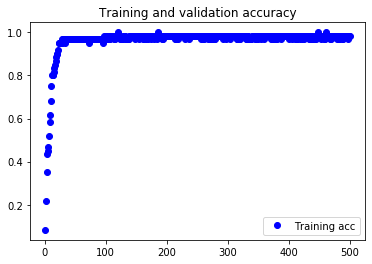

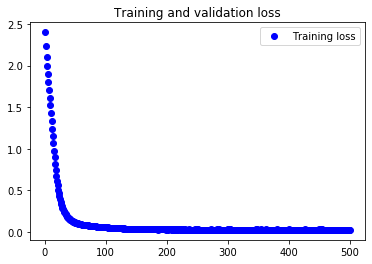

In [14]:
#saving the model in the file system. This will be used to load in the later phase
model.save('model_ChatBot.h5')



history_dict = history.history
history_dict.keys()
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()